In [ ]:
# Loading and Preparing the Iris Dataset

# Start by importing scikit-learn's datasets module and loading Iris as a dictionary with 
# input features (X) and targets (y).

from sklearn import datasets
iris = datasets.load_iris()

In [ ]:
# Convert the input data to a pandas DataFrame for easier viewing, and add the target species 
# (0=setosa, 1=versicolor, 2=virginica) as a 'species' column.
    
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

In [ ]:
# Shorten column names for simplicity: sepal length → 'sl', sepal width → 'sw', petal length → 'pl', 
# petal width → 'pw'.
    
df.columns = ['sl', 'sw', 'pl', 'pw', 'species']

In [7]:
# Filter to just two classes (versicolor=1, virginica=2) and one feature (petal length 'pl') for the 
# simplest case.

iris_2species = df[df['species'].isin([1, 2])]
X = iris_2species[['pl']].values  # Input: petal length as 2D array
y = iris_2species['species'].values  # Target: 1 or 2

# Scikit-learn expects X as a 2D array (even for one feature), so reshape if needed: X = X.reshape(-1, 1).

In [8]:
# Fitting the Logistic Regression Model
# Import and create the model from scikit-learn's linear_model module—no extra parameters needed for defaults.

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()  # Creates empty model instance
lr.fit(X, y)  # Trains it: finds best β₀ and β₁ minimizing cross-entropy
# The fitted lr object now stores the learned parameters.

LogisticRegression()

In [9]:
# Extracting Coefficients and Threshold
# Access the intercept (β₀) and slope (β₁) directly:

beta0 = lr.intercept_[0]   # Shape (1,) for binary, so index 0
beta1 = lr.coef_[0][0]     # Shape (1,1) for one feature, flatten to scalar
print(f"β₀: {beta0}, β₁: {beta1}")

β₀: -17.509046997389056, β₁: 3.5908268927965423


In [10]:
# Compute the threshold where sigmoid=0.5: x-bar = -β₀ / β₁ (predict class 1 if pl > threshold).

threshold = -beta0 / beta1
print(f"Threshold: {threshold:.2f}")  # Around 4.87 cm
# This means petal lengths >4.87 classify as virginica (2), below as versicolor (1).

Threshold: 4.88


In [21]:
# Approximate Formulas from Theory
# Test the hand-derived formulas as a check (using sample means/variances, assuming equal variance).

import numpy as np

X1 = iris_2species[iris_2species['species']==1]['pl']  # Versicolor (class 1, but treat as 0 for approx)
X2 = iris_2species[iris_2species['species']==2]['pl']  # Virginica (class 2, treat as 1)

mu0, mu1 = X1.mean(), X2.mean()  # Sample means
v02, v12 = X1.var(), X2.var()    # Sample variances
v2 = (v02 + v12) / 2             # Average variance (assumption)

beta0_approx = (mu1**2 - mu0**2) / (2 * v2)  # Full formula, but simplified
beta1_approx = (mu0 - mu1) / v2
threshold_approx = -beta0_approx / beta1_approx  # Around 4.84, close to 4.87

print(f"β₀: {beta0_approx}, β₁: {beta1_approx}")
print(f"Threshold: {threshold_approx:.2f}") 

# These match theory but only work for this exact Gaussian-equal-variance case.

β₀: 24.128293713681984, β₁: -4.918119387216059
Threshold: 4.91


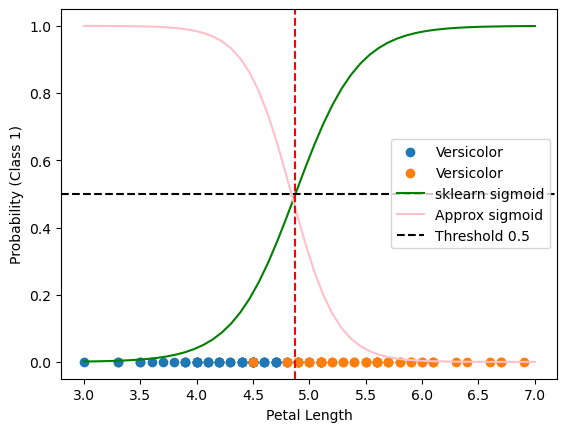

In [18]:
# Visualizing the Results
# Plot class 0 (versicolor) at y=0, class 1 (virginica) at y=1 as jittered points.

import matplotlib.pyplot as plt
# plt.scatter(X[y==1], np.zeros_like(X[y==1]), label='Versicolor', alpha=0.7)
# plt.scatter(X[y==2], np.ones_like(X[y==2]), label='Virginica', alpha=0.7)

plt.scatter(X1, np.zeros(50), label='Versicolor')
plt.scatter(X2, np.zeros(50), label='Versicolor')

# Sigmoid from sklearn betas (green curve)
x_plot = np.linspace(3, 7)
# x_plot = np.linspace(X.min(), X.max(), 100).reshape(-1,1)

sigmoid_sk = 1 / (1 + np.exp(-(beta0 + beta1 * x_plot)))
plt.plot(x_plot, sigmoid_sk, color='green', label='sklearn sigmoid')

# Sigmoid from approx betas (pink curve)
sigmoid_approx = 1 / (1 + np.exp(-(beta0_approx + beta1_approx * x_plot)))
plt.plot(x_plot, sigmoid_approx, color='pink', label='Approx sigmoid')

plt.axhline(0.5, color='black', linestyle='--', label='Threshold 0.5')
plt.axvline(threshold, color='red', linestyle='--')
plt.legend(); plt.xlabel('Petal Length'); plt.ylabel('Probability (Class 1)')
plt.show()
# Green (sklearn) and pink (approx) curves hug the data closely and overlap a lot—proof both work here, 
# but sklearn's optimization is more general.